In [2]:
import os
import numpy as np
from matplotlib import pyplot
from scipy import optimize
from scipy.io import loadmat
import utils
%matplotlib inline


In [3]:
input_layer_size = 400
num_labels = 10
data = loadmat(os.path.join('Data','ex3data1.mat'))
X, y = data['X'], data['y'].ravel()


In [4]:
y[y==10]=0
m = y.size

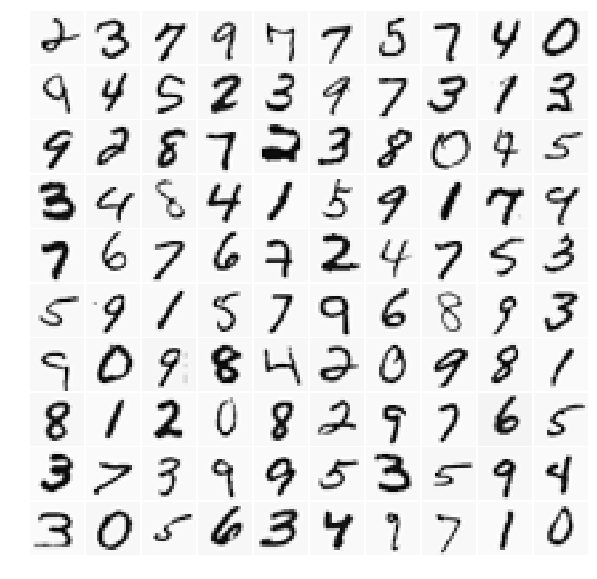

In [5]:
rand_indices = np.random.choice(m,100,replace=False)
sel = X[rand_indices,:]
utils.displayData(sel)

In [6]:
theta_t = np.array([-2,-1,1,2],dtype=float)
X_t = np.concatenate([np.ones((5,1)),np.arange(1,16).reshape(5,3,order='F')/10.0], axis=1)
y_t = np.array([1,0,1,0,1])
lambda_t = 3


In [7]:
def lrCostFunction(theta,X,y,lambda_):
    m = y.size
    if y.dtype == bool:
        y = y.astype(int)
    J = 0
    grad = np.zeros(theta.shape)
    h = utils.sigmoid(X.dot(theta.T))
    
    temp= theta
    temp[0] =0
    J = (1/m) * np.sum(-y.dot(np.log(h)) - (1-y).dot(np.log(1-h))) + (lambda_/(2*m)) * np.sum(np.square(temp))
    
    grad= (1/m)*(h-y).dot(X)
    grad = grad + (lambda_/ m)*temp
    
    return J,grad

In [8]:
J, grad = lrCostFunction(theta_t,X_t,y_t,lambda_t)
print('Cost         : {:.6f}'.format(J))
print('Expected cost: 2.534819')
print('-----------------------')
print('Gradients:')
print(' [{:.6f}, {:.6f}, {:.6f}, {:.6f}]'.format(*grad))
print('Expected gradients:')
print(' [0.146561, -0.548558, 0.724722, 1.398003]');

Cost         : 2.534819
Expected cost: 2.534819
-----------------------
Gradients:
 [0.146561, -0.548558, 0.724722, 1.398003]
Expected gradients:
 [0.146561, -0.548558, 0.724722, 1.398003]


In [9]:
def oneVsAll(X,y,num_labels,lambda_):
    m,n = X.shape
    all_theta = np.zeros((num_labels,n+1))
    X = np.concatenate([np.ones((m,1)),X],axis=1)
    
    for c in np.arange(num_labels):
        initial_theta = np.zeros(n+1)
        options ={'maxiter':50}
        res = optimize.minimize(lrCostFunction,initial_theta,(X,(y==c),lambda_),jac=True,method='CG',options=options)
        
        all_theta[c] = res.x
    return all_theta

In [10]:
lambda_ = 0.1
all_theta = oneVsAll(X,y,num_labels,lambda_)


In [11]:
def predictOneVsAll(all_theta,X):
    m = X.shape[0];
    num_labels = all_theta.shape[0]
    p = np.zeros(m)
    
    X = np.concatenate([np.ones((m,1)),X],axis=1)
    p = np.argmax(utils.sigmoid(X.dot(all_theta.T)),axis=1)
    
    return p
    

In [12]:
pred = predictOneVsAll(all_theta,X)
print('Training Set Accuracy: {:.2f}%'.format(np.mean(pred == y) * 100))

Training Set Accuracy: 95.12%


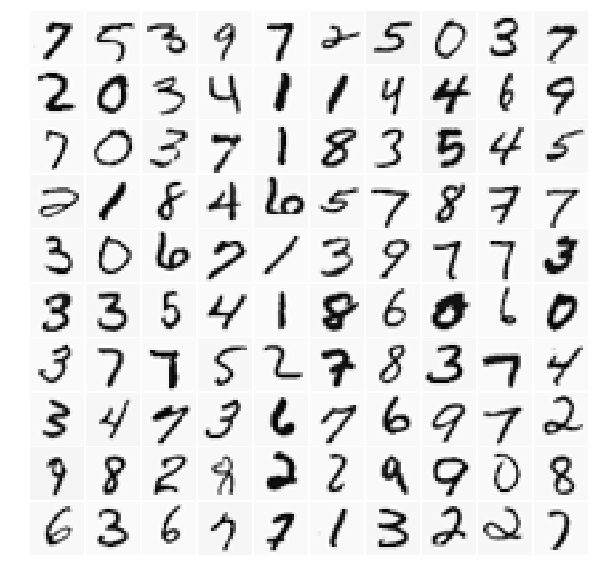

In [13]:
data = loadmat(os.path.join('Data','ex3data1.mat'))
X,y = data['X'],data['y'].ravel()
y[y==10] = 0

m = y.size

indices = np.random.permutation(m)

rand_indices = np.random.choice(m,100,replace=False)

sel = X[rand_indices,:]

utils.displayData(sel)

In [14]:
input_layer_size = 400
hidden_layer_size = 25
num_labels = 10


weights = loadmat(os.path.join('Data','ex3weights.mat'))


Theta1, Theta2 = weights['Theta1'], weights['Theta2']

Theta2 = np.roll(Theta2,1,axis=0)


In [15]:
Theta1.shape

(25, 401)

In [ ]:
def predict(Theta1,Theta2,X):
    if X.ndim==1:
        X = X[None]
        
    m = X.shape[0]
    num_labels = Theta2.shape[0]
    p = np.zeros(X.shape[0])
    